In [1]:
filename = '2-spiral.txt'
f = open(filename,'r')

datapoints = []

for x in f:
    temp_ls = []
    temp = ''
    for ch in x:
        if (ch >= '0' and ch <='9') or (ch == '.') or (ch == '-'):
#             print('ch:' + ch +' temp:' + temp)
            temp += ch
        elif ch == ',':
#             print('temp:' + temp)
            temp_ls.append(float(temp))
            temp = ''
        else:
            if(temp_ls != []):
                datapoints.append(temp_ls)
            break

print(datapoints)

[[1.5, 0.0], [1.50973, 0.028461], [1.51892, 0.057289], [1.52755, 0.086473], [1.53562, 0.116003], [1.54312, 0.145868], [1.55003, 0.176056], [1.55635, 0.206556], [1.56207, 0.237356], [1.56717, 0.268445], [1.57166, 0.29981], [1.57552, 0.331439], [1.57873, 0.363319], [1.58131, 0.395437], [1.58323, 0.42778], [1.58448, 0.460335], [1.58508, 0.493089], [1.58499, 0.526027], [1.58422, 0.559137], [1.58277, 0.592403], [1.58062, 0.625812], [1.57777, 0.659349], [1.57421, 0.692999], [1.56995, 0.726748], [1.56497, 0.760581], [1.55926, 0.794483], [1.55283, 0.828439], [1.54567, 0.862433], [1.53778, 0.896449], [1.52916, 0.930473], [1.51979, 0.964488], [1.50968, 0.998479], [1.49883, 1.03243], [1.48723, 1.06632], [1.47488, 1.10015], [1.46179, 1.13388], [1.44794, 1.16751], [1.43334, 1.20101], [1.41799, 1.23438], [1.40189, 1.2676], [1.38504, 1.30064], [1.36744, 1.3335], [1.34909, 1.36615], [1.32999, 1.39858], [1.31015, 1.43078], [1.28956, 1.46272], [1.26823, 1.49439], [1.24616, 1.52577], [1.22336, 1.55685], 

In [2]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)

# principal_components = pca.fit_transform(datapoints)
# principal_components
principal_components = datapoints
for point in principal_components:
    print(point)

[1.5, 0.0]
[1.50973, 0.028461]
[1.51892, 0.057289]
[1.52755, 0.086473]
[1.53562, 0.116003]
[1.54312, 0.145868]
[1.55003, 0.176056]
[1.55635, 0.206556]
[1.56207, 0.237356]
[1.56717, 0.268445]
[1.57166, 0.29981]
[1.57552, 0.331439]
[1.57873, 0.363319]
[1.58131, 0.395437]
[1.58323, 0.42778]
[1.58448, 0.460335]
[1.58508, 0.493089]
[1.58499, 0.526027]
[1.58422, 0.559137]
[1.58277, 0.592403]
[1.58062, 0.625812]
[1.57777, 0.659349]
[1.57421, 0.692999]
[1.56995, 0.726748]
[1.56497, 0.760581]
[1.55926, 0.794483]
[1.55283, 0.828439]
[1.54567, 0.862433]
[1.53778, 0.896449]
[1.52916, 0.930473]
[1.51979, 0.964488]
[1.50968, 0.998479]
[1.49883, 1.03243]
[1.48723, 1.06632]
[1.47488, 1.10015]
[1.46179, 1.13388]
[1.44794, 1.16751]
[1.43334, 1.20101]
[1.41799, 1.23438]
[1.40189, 1.2676]
[1.38504, 1.30064]
[1.36744, 1.3335]
[1.34909, 1.36615]
[1.32999, 1.39858]
[1.31015, 1.43078]
[1.28956, 1.46272]
[1.26823, 1.49439]
[1.24616, 1.52577]
[1.22336, 1.55685]
[1.19983, 1.58761]
[1.17557, 1.61803]
[1.15059, 1.

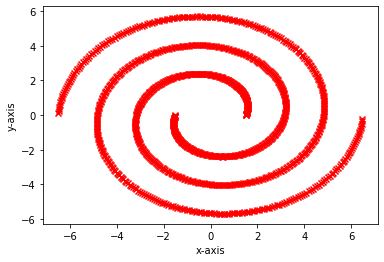

In [4]:
import matplotlib.pyplot as plt 

x_arr = []
y_arr = []

for point in principal_components:
    x_arr.append(point[0])
    y_arr.append(point[1])
 
plt.scatter(x_arr,y_arr, c = 'red', marker = 'x')

plt.xlabel('x-axis') 
plt.ylabel('y-axis') 

# plt.title('SSE vs num of clusters') 

plt.show() 


In [5]:
import math
def kernel_func(prev,point,h):
    exponential_term = (prev[0]-point[0])**2 + (prev[1]-point[1])**2
    exponential_term = -exponential_term/(2*(h**2))
    return ((1/(2*math.pi)) * (math.exp(exponential_term)))

In [6]:
def distance(point_a,point_b):
    return (point_a[0] - point_b[0])**2 + (point_a[1] - point_b[1])**2 

In [7]:
def find_attractor(x,h,epsilon):
    prev = x
    while(True):
        kernel_sum = 0
        kernel_weighted_sum = [0,0]
        for point in principal_components:
            kernel_term = kernel_func(prev,point,h)
            kernel_sum += kernel_term
            kernel_weighted_sum[0] += kernel_term*point[0]
            kernel_weighted_sum[1] += kernel_term*point[1]
            
        curr = [kernel_weighted_sum[0]/kernel_sum,kernel_weighted_sum[1]/kernel_sum]
        
        if distance(curr,prev) < epsilon:
            return curr
        
        prev = curr

In [8]:
def pdf(attr_point,h):
    kernel_sum = 0
    for point in principal_components:
        kernel_term = kernel_func(attr_point,point,h)
        kernel_sum += kernel_term
    
    return kernel_sum/(len(principal_components)*(h**2))

In [9]:
import time

start = time.time()

attractors = {}
h = 0.1
epsilon = 0.5
zi = 0.05
for point in principal_components:
    temp = find_attractor(point,h,epsilon)
    if pdf(temp,h) > zi:
        attractors[tuple(temp)] = point

end = time.time()
print('Time taken:' + str(end-start))

Time taken:2.7386786937713623


In [10]:
for point in attractors:
    print(str(point) + ': ' + str(pdf(point,h)))

(1.5204625734677235, 0.06695858288023604): 0.10490507818070785
(1.5238364254469952, 0.07928955355937906): 0.10914001893992528
(1.5277523090889449, 0.09407814641556486): 0.11349918678473148
(1.53221147702657, 0.1115827979792483): 0.11767493328030253
(1.5371622414788595, 0.13192967220950746): 0.1212996712811549
(1.5424886176543813, 0.15504869364442023): 0.12405443230817945
(1.5480163680637735, 0.18065568270873028): 0.12579399391269763
(1.5535396928777838, 0.20830648568470592): 0.1265976602672603
(1.5588555390679792, 0.2374899525743193): 0.12670159885674753
(1.5637951048053722, 0.2677372359752037): 0.1263738583152333
(1.56823861673764, 0.29869362158867774): 0.12582318004431903
(1.5721109393051136, 0.33012563773420844): 0.12517592245500225
(1.5753696176450087, 0.3618996428479808): 0.1244950578326798
(1.5779918127478885, 0.39394914004428294): 0.1238072101781097
(1.579963642210966, 0.4262360852142261): 0.1231222089690899
(1.5812756450606749, 0.4587396241306283): 0.12244315084843166
(1.581920

(-2.903566197115583, 0.8240856524565431): 0.06911820177537925
(-2.928260100638317, 0.771759406794252): 0.06889632252600239
(-2.9520110549114587, 0.7187926753356408): 0.0686760312087881
(-2.9748023328767226, 0.6652039147830504): 0.06845744077838331
(-2.996617209608765, 0.6110130245511702): 0.06824036968452742
(-3.0174419949373004, 0.556235222352486): 0.06802452147848752
(-3.0372624995220385, 0.5008898099408954): 0.06780980237098437
(-3.056066425821757, 0.4449920163814273): 0.06759635199569969
(-3.073839311967654, 0.38856233651633887): 0.06738435421923843
(-3.09056651961795, 0.3316219506834615): 0.06717379766551648
(-3.106235063094987, 0.2741889200537124): 0.06696451644532121
(-3.120832690131242, 0.21628234252750236): 0.06675639075077475
(-3.134347354602508, 0.1579237793254467): 0.06654942821409943
(-3.1467684107729017, 0.09912962855894979): 0.06634368701426624
(-3.1580831678543126, 0.03992576407752824): 0.06613925002103246
(-3.168281210776477, -0.019671800744898667): 0.06593613246510374

(2.9748023328767226, -0.6652039147830504): 0.06845744077838331
(2.996617209608765, -0.6110130245511702): 0.06824036968452742
(3.0174419949373004, -0.556235222352486): 0.06802452147848752
(3.0372624995220385, -0.5008898099408954): 0.06780980237098437
(3.056066425821757, -0.4449920163814273): 0.06759635199569969
(3.073839311967654, -0.38856233651633887): 0.06738435421923843
(3.09056651961795, -0.3316219506834615): 0.06717379766551648
(3.106235063094987, -0.2741889200537124): 0.06696451644532121
(3.120832690131242, -0.21628234252750236): 0.06675639075077475
(3.134347354602508, -0.1579237793254467): 0.06654942821409943
(3.1467684107729017, -0.09912962855894979): 0.06634368701426624
(3.1580831678543126, -0.03992576407752824): 0.06613925002103246
(3.168281210776477, 0.019671800744898667): 0.06593613246510374
(3.1773508243296904, 0.07963830329155114): 0.06573432650209828
(3.1852813946633227, 0.13995282824977434): 0.06553375699008673
(3.1920629864942964, 0.20059550635280124): 0.065334356021466

In [11]:
len(attractors)

542

In [12]:
import time
cluster = {}

for point in attractors:
    cluster[tuple(attractors[point])] = -1

cluster_number = 0

start = time.time()
for point in attractors:
    if(cluster[tuple(attractors[point])] == -1):
        cluster_number += 1
#         cluster[tuple(point)] = cluster_number
        cluster[tuple(attractors[point])] = cluster_number
        for point_a in attractors:
            if(abs(point[0] - point_a[0]) < h or abs(point[1] - point_a[1]) < h):
                if(cluster[tuple(attractors[point_a])] == -1):
#                     cluster[tuple(point_a)] = cluster_number
                    cluster[tuple(attractors[point_a])] = cluster_number

end = time.time()
print('Time taken:' + str(end-start))

Time taken:0.012999773025512695


In [13]:
itr = 0
for c in cluster:
    print('itr:' + str(itr) + ': ' + str(c) + ': '+str(cluster[c]))
    itr += 1

itr:0: (1.5, 0.0): 1
itr:1: (1.50973, 0.028461): 1
itr:2: (1.51892, 0.057289): 1
itr:3: (1.52755, 0.086473): 1
itr:4: (1.53562, 0.116003): 1
itr:5: (1.54312, 0.145868): 1
itr:6: (1.55003, 0.176056): 1
itr:7: (1.55635, 0.206556): 1
itr:8: (1.56207, 0.237356): 1
itr:9: (1.56717, 0.268445): 1
itr:10: (1.57166, 0.29981): 1
itr:11: (1.57552, 0.331439): 1
itr:12: (1.57873, 0.363319): 1
itr:13: (1.58131, 0.395437): 1
itr:14: (1.58323, 0.42778): 1
itr:15: (1.58448, 0.460335): 1
itr:16: (1.58508, 0.493089): 1
itr:17: (1.58499, 0.526027): 1
itr:18: (1.58422, 0.559137): 1
itr:19: (1.58277, 0.592403): 1
itr:20: (1.58062, 0.625812): 1
itr:21: (1.57777, 0.659349): 1
itr:22: (1.57421, 0.692999): 1
itr:23: (1.56995, 0.726748): 1
itr:24: (1.56497, 0.760581): 1
itr:25: (1.55926, 0.794483): 1
itr:26: (1.55283, 0.828439): 1
itr:27: (1.54567, 0.862433): 1
itr:28: (1.53778, 0.896449): 1
itr:29: (1.52916, 0.930473): 1
itr:30: (1.51979, 0.964488): 1
itr:31: (1.50968, 0.998479): 1
itr:32: (1.49883, 1.03243): 1

In [14]:
cluster_number

46

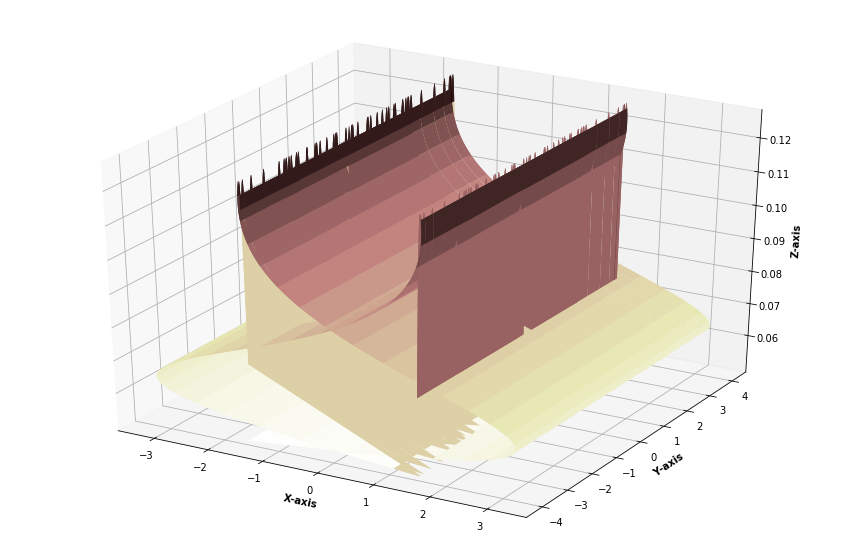

In [41]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

ax = plt.axes(projection = '3d')

z = []
x = []
y = []

for c in cluster:
    x.append(c[0])
    y.append(c[1])
    
    z.append(pdf(c,h))

X,Y = np.meshgrid(x,y)
Z,T = np.meshgrid(z,z)
ax.plot_surface(X,Y,Z,cmap='pink_r')

my_cmap = plt.get_cmap('hsv')


# ax.scatter3D(x,y,z)

ax.set_xlabel('X-axis', fontweight ='bold') 
ax.set_ylabel('Y-axis', fontweight ='bold') 
ax.set_zlabel('Z-axis', fontweight ='bold')

plt.show()
# print(Z)